# Financial Data Aggregation Project

## Python data preparation and visualization by Youssef 

In [251]:
### First importing libraries and packeges 

In [101]:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 2. Connect to Azure Database

In [125]:
import pyodbc
conn = pyodbc.connect(
    'DRIVER={/opt/homebrew/lib/libmsodbcsql.18.dylib};'
    'SERVER=group777.database.windows.net;'
    'DATABASE=Financial;'
    'UID=baraka;'
    'PWD=KAREM89634@;'
    'Encrypt=yes;'
    'TrustServerCertificate=no;'
    'Connection Timeout=30;'
)
cursor = conn.cursor()
cursor.execute("SELECT 1")
print(cursor.fetchone())
conn.close()


(1,)


In [140]:

server = 'group777.database.windows.net'  
database = 'Financial'                    
username = 'baraka'                          
password = 'KAREM89634@'                          

params = urllib.parse.quote_plus(f"Driver={{/opt/homebrew/lib/libmsodbcsql.18.dylib}};Server={server};Database={database};UID={username};PWD={password}")

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

try:
    query = "SELECT * FROM fact_sales" 
    
    sales_data = pd.read_sql(query, engine)
    
    print(sales_data.head())
    
except Exception as e:
    print(f"Error: {e}")

finally:
    engine.dispose()
    print("Engine disposed.")

  product_key customer_key territory_key order_date_key sales_order_id  \
0         383         5872             4       20140309          67939   
1         285         5819             4       20140309          67940   
2         383         5819             4       20140309          67940   
3         375         5819             4       20140309          67940   
4         542         5819             4       20140309          67940   

  line_number quantity unit_price  unit_cost tax_amount  freight  \
0       98557        1      21.98     8.2205       None  57.9243   
1       98558        1    2319.99  1265.6195       None  59.7985   
2       98559        1      21.98     8.2205       None  59.7985   
3       98560        1       4.99     1.8663       None  59.7985   
4       98561        1       9.99     3.7363       None  59.7985   

  extended_sales extened_cost                     created_at  
0          21.98       8.2205  2024-10-05 14:56:37.773000000  
1        2319.99    

## 3. Data Retrieval

In [142]:

query = "SELECT * FROM fact_sales"  

sales_data = pd.read_sql(query, engine)

sales_data.head()

,product_key,customer_key,territory_key,order_date_key,sales_order_id,line_number,quantity,unit_price,unit_cost,tax_amount,freight,extended_sales,extened_cost,created_at
0,383,5872,4,20140309,67939,98557,1,21.98,8.2205,None,57.9243,21.98,8.2205,2024-10-05 14:56:37.773000000
1,285,5819,4,20140309,67940,98558,1,2319.99,1265.6195,None,59.7985,2319.99,1265.6195,2024-10-05 14:56:37.773000000
2,383,5819,4,20140309,67940,98559,1,21.98,8.2205,None,59.7985,21.98,8.2205,2024-10-05 14:56:37.773000000
3,375,5819,4,20140309,67940,98560,1,4.99,1.8663,None,59.7985,4.99,1.8663,2024-10-05 14:56:37.773000000
4,542,5819,4,20140309,67940,98561,1,9.99,3.7363,None,59.7985,9.99,3.7363,2024-10-05 14:56:37.773000000


## 4. Data Exploration

In [144]:

print(sales_data.info())
print(sales_data.describe())

# Check for null values
null_counts = sales_data.isnull().sum()
print("Null values in each column:\n", null_counts[null_counts > 0])

# Check data types
print("Data types:\n", sales_data.dtypes)

# Visualize the distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['sales_amount'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120796 entries, 0 to 120795
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   product_key     120796 non-null  object
 1   customer_key    120796 non-null  object
 2   territory_key   120796 non-null  object
 3   order_date_key  120796 non-null  object
 4   sales_order_id  120796 non-null  object
 5   line_number     120796 non-null  object
 6   quantity        120796 non-null  object
 7   unit_price      120796 non-null  object
 8   unit_cost       120796 non-null  object
 9   tax_amount      0 non-null       object
 10  freight         120796 non-null  object
 11  extended_sales  120796 non-null  object
 12  extened_cost    120796 non-null  object
 13  created_at      120796 non-null  object
dtypes: object(14)
memory usage: 12.9+ MB
None
       product_key customer_key territory_key order_date_key sales_order_id  \
count       120796       120796        1207

KeyError: 'sales_amount'

<Figure size 1000x600 with 0 Axes>

## 5. Data Cleansing and Cleaning

In [148]:
sales_data.fillna(method='ffill', inplace=True)  # Forward fill for time series data

sales_data.drop_duplicates(inplace=True)

sales_data['order_date_key'] = pd.to_datetime(sales_data['order_date_key'], errors='coerce')

if sales_data['order_date_key'].isnull().any():
    print("Warning: Some date values could not be converted and are NaT.")

sales_data['year'] = sales_data['order_date_key'].dt.year
sales_data['month'] = sales_data['order_date_key'].dt.month
sales_data['day'] = sales_data['order_date_key'].dt.day
sales_data['day_of_week'] = sales_data['order_date_key'].dt.day_name()

print(sales_data.info())


/var/folders/xc/t80hs_s975q3fj_fyr68x1b80000gn/T/ipykernel_35836/1315050059.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)  # Forward fill for time series data


<class 'pandas.core.frame.DataFrame'>
Index: 60398 entries, 0 to 95331
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_key     60398 non-null  object        
 1   customer_key    60398 non-null  object        
 2   territory_key   60398 non-null  object        
 3   order_date_key  60398 non-null  datetime64[ns]
 4   sales_order_id  60398 non-null  object        
 5   line_number     60398 non-null  object        
 6   quantity        60398 non-null  object        
 7   unit_price      60398 non-null  object        
 8   unit_cost       60398 non-null  object        
 9   tax_amount      0 non-null      object        
 10  freight         60398 non-null  object        
 11  extended_sales  60398 non-null  object        
 12  extened_cost    60398 non-null  object        
 13  created_at      60398 non-null  object        
 14  year            60398 non-null  int32         
 15  month  

## 6. Feature Engineering

In [176]:
monthly_sales = sales_data.groupby(['year', 'month'])['extended_sales'].sum().reset_index()

sales_pivot = sales_data.pivot_table(
    values='extended_sales',
    index='month',
    columns='year',
    aggfunc='sum',
    fill_value=0
)


## 7. Data Visualization

In [200]:
# Check data type of 'extended_sales'
print("Data type of 'extended_sales':", sales_data['extended_sales'].dtype)

# Check for missing values
num_missing = sales_data['extended_sales'].isnull().sum()
print(f"Number of missing values in 'extended_sales': {num_missing}")

# Print a sample of 'extended_sales'
print("Sample 'extended_sales' values:")
print(sales_data['extended_sales'].head())


Data type of 'extended_sales': object
Number of missing values in 'extended_sales': 0
Sample 'extended_sales' values:
0      21.98
1    2319.99
2      21.98
3       4.99
4       9.99
Name: extended_sales, dtype: object


In [204]:
sales_data['extended_sales'] = sales_data['extended_sales'].replace('[^\d\.-]', '', regex=True)

sales_data['extended_sales'] = pd.to_numeric(sales_data['extended_sales'], errors='coerce')


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xc/t80hs_s975q3fj_fyr68x1b80000gn/T/ipykernel_35836/61180009.py:2: SyntaxWarning: invalid escape sequence '\d'
  sales_data['extended_sales'] = sales_data['extended_sales'].replace('[^\d\.-]', '', regex=True)


In [206]:
# Verify the data type and missing values after conversion
print("Data type of 'extended_sales' after conversion:", sales_data['extended_sales'].dtype)
num_missing = sales_data['extended_sales'].isnull().sum()
print(f"Number of missing values in 'extended_sales' after conversion: {num_missing}")


Data type of 'extended_sales' after conversion: float64
Number of missing values in 'extended_sales' after conversion: 0


In [208]:
num_nat = sales_data['order_date_key'].isnull().sum()
print(f"Number of NaT in 'order_date_key' after conversion: {num_nat}")

# If there are NaT values, inspect them
if num_nat > 0:
    print("Rows with NaT in 'order_date_key':")
    print(sales_data[sales_data['order_date_key'].isnull()][['order_date_key']].head())


Number of NaT in 'order_date_key' after conversion: 0


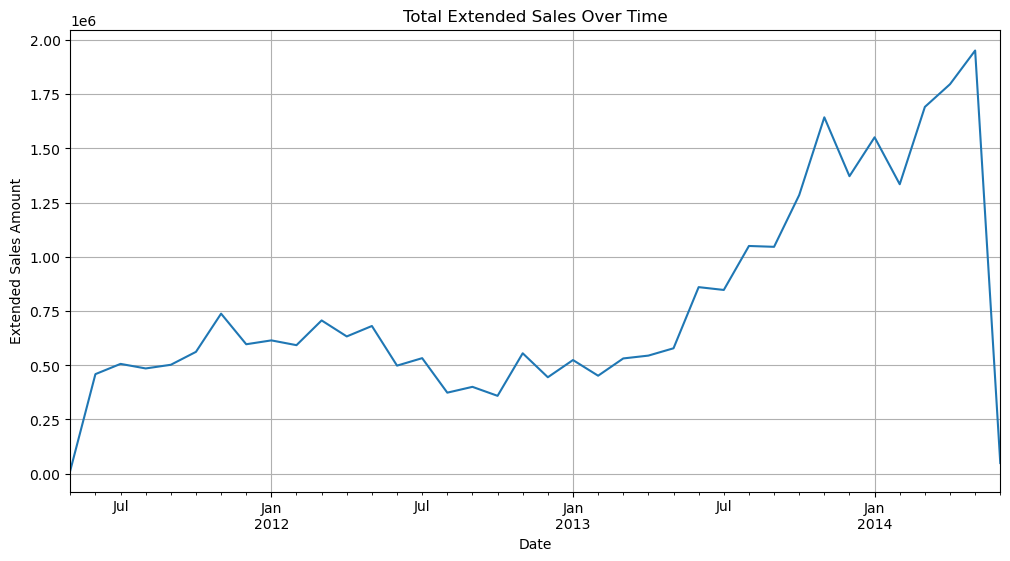

In [210]:
plt.figure(figsize=(12, 6))

total_sales = sales_data.groupby(sales_data['order_date_key'].dt.to_period("M"))['extended_sales'].sum()

total_sales.index = total_sales.index.to_timestamp()

total_sales = pd.to_numeric(total_sales, errors='coerce')

if total_sales.isnull().all():
    print("No numeric data available in 'total_sales' to plot.")
else:
    total_sales.plot(kind='line')
    plt.title('Total Extended Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Extended Sales Amount')
    plt.grid()
    plt.show()


In [218]:
# Check data types in 'sales_pivot'
print("Data types in 'sales_pivot':")
print(sales_pivot.dtypes)

# Ensure all data types are numeric
if not all([np.issubdtype(dtype, np.number) for dtype in sales_pivot.dtypes]):
    print("Non-numeric data found in 'sales_pivot'. Converting to numeric.")
    sales_pivot = sales_pivot.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric data
if sales_pivot.isnull().values.any():
    print("Missing or invalid data detected in 'sales_pivot'.")


Data types in 'sales_pivot':
year
2011    float64
2012    float64
2013    float64
2014    float64
dtype: object


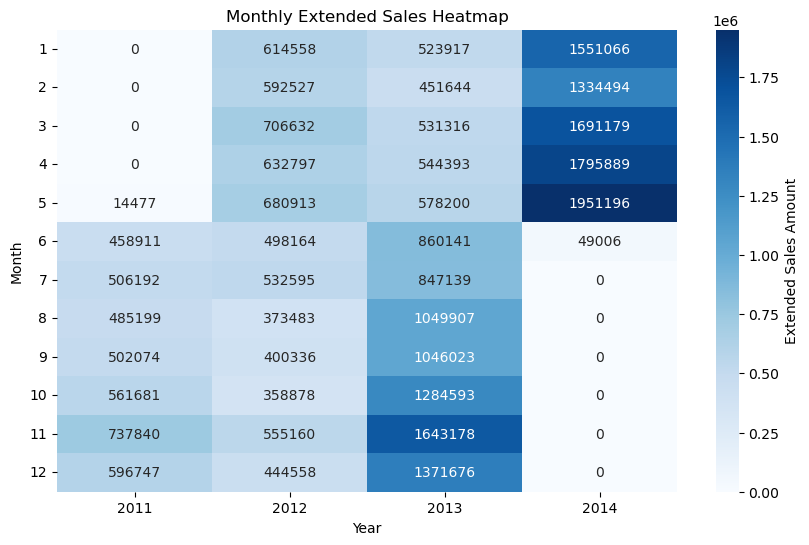

In [220]:
# Monthly sales heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    sales_pivot,
    annot=True,
    fmt=".0f",
    cmap='Blues',
    cbar_kws={'label': 'Extended Sales Amount'}
)
plt.title('Monthly Extended Sales Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()


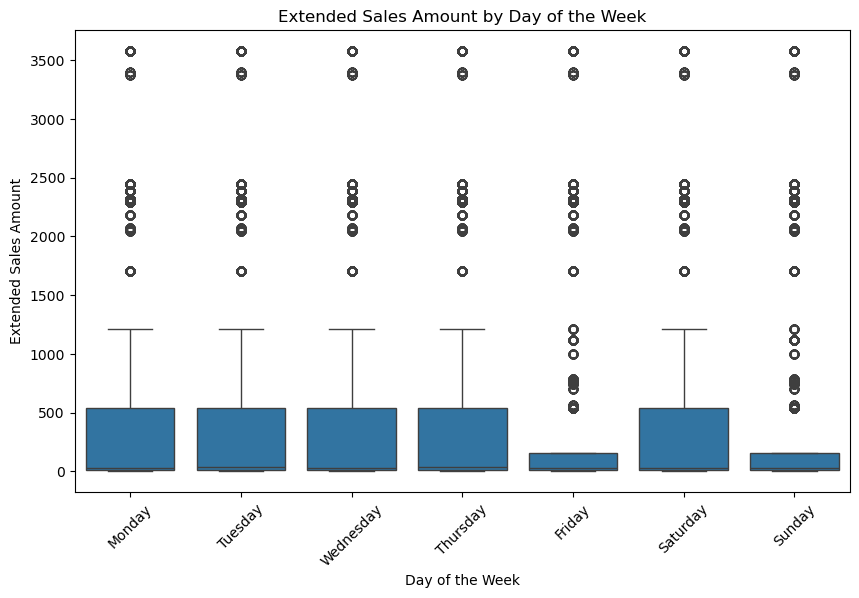

In [222]:
# Sales by day of the week
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(
    x='day_of_week',
    y='extended_sales',
    data=sales_data,
    order=order
)
plt.title('Extended Sales Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Extended Sales Amount')
plt.xticks(rotation=45)
plt.show()


/var/folders/xc/t80hs_s975q3fj_fyr68x1b80000gn/T/ipykernel_35836/3311139014.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


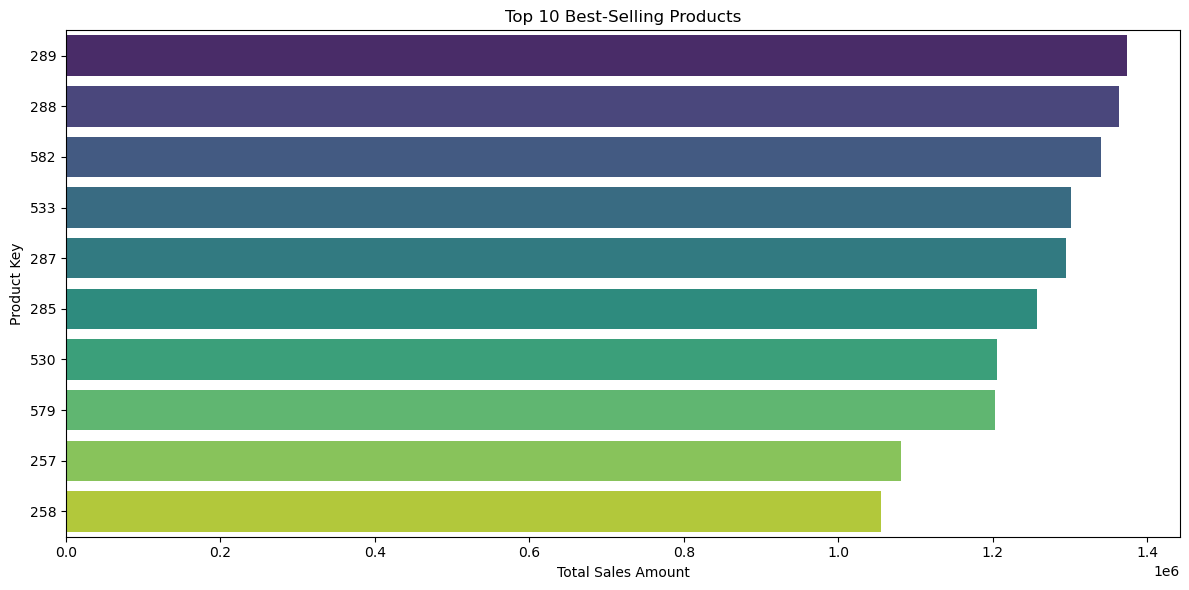

In [230]:


# Aggregate sales by product
product_sales = sales_data.groupby('product_key')['extended_sales'].sum().reset_index()

# Get the top 10 products
top_products = product_sales.sort_values(by='extended_sales', ascending=False).head(10)

# Bar plot of top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(
    x='extended_sales',
    y='product_key',
    data=top_products,
    palette='viridis'
)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Key')
plt.tight_layout()
plt.show()


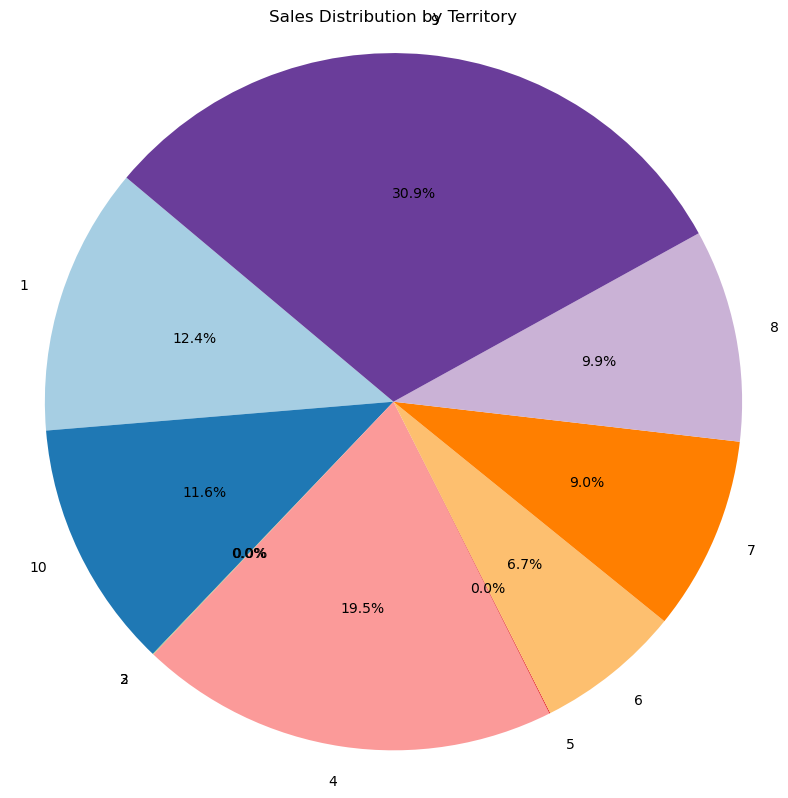

In [232]:
# Aggregate sales by territory
territory_sales = sales_data.groupby('territory_key')['extended_sales'].sum().reset_index()

# Pie chart of sales by territory
plt.figure(figsize=(8, 8))
plt.pie(
    territory_sales['extended_sales'],
    labels=territory_sales['territory_key'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Sales Distribution by Territory')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


/var/folders/xc/t80hs_s975q3fj_fyr68x1b80000gn/T/ipykernel_35836/1727366677.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.set_index('order_date_key').resample('M')['extended_sales'].sum().reset_index()


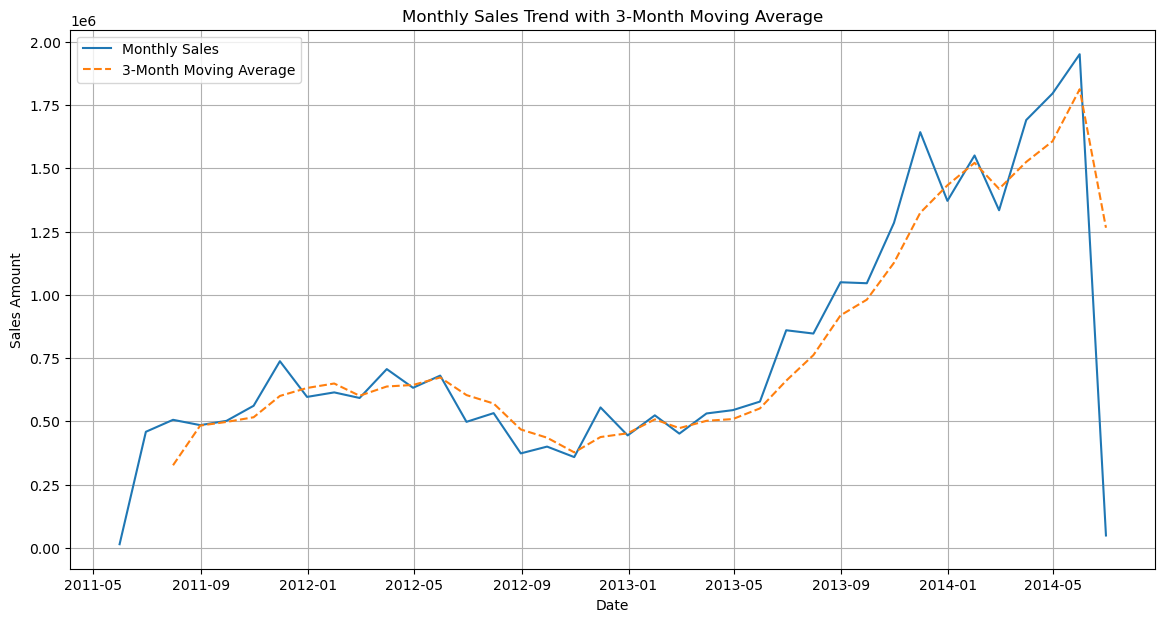

In [234]:
# Resample sales data to monthly frequency
monthly_sales = sales_data.set_index('order_date_key').resample('M')['extended_sales'].sum().reset_index()

# Calculate 3-month moving average
monthly_sales['3_month_MA'] = monthly_sales['extended_sales'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['order_date_key'], monthly_sales['extended_sales'], label='Monthly Sales')
plt.plot(monthly_sales['order_date_key'], monthly_sales['3_month_MA'], label='3-Month Moving Average', linestyle='--')
plt.title('Monthly Sales Trend with 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.show()


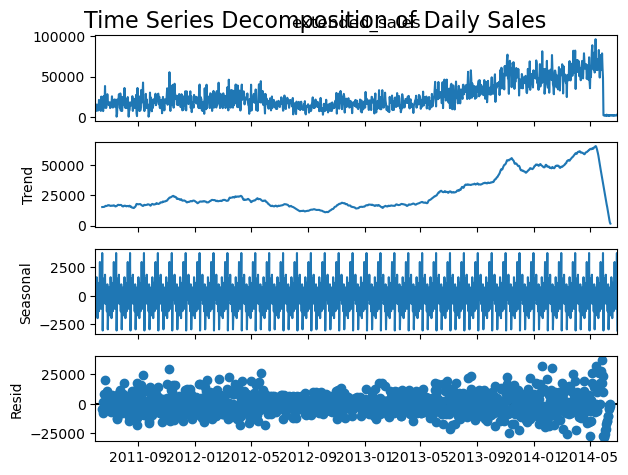

In [240]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_ts = sales_data.set_index('order_date_key')

daily_sales = sales_ts['extended_sales'].resample('D').sum()

# Handle missing values by filling with zeros
daily_sales.fillna(0, inplace=True)

decomposition = seasonal_decompose(daily_sales, model='additive', period=30)

# Plot the decomposed components
decomposition.plot()
plt.suptitle('Time Series Decomposition of Daily Sales', fontsize=16)
plt.show()


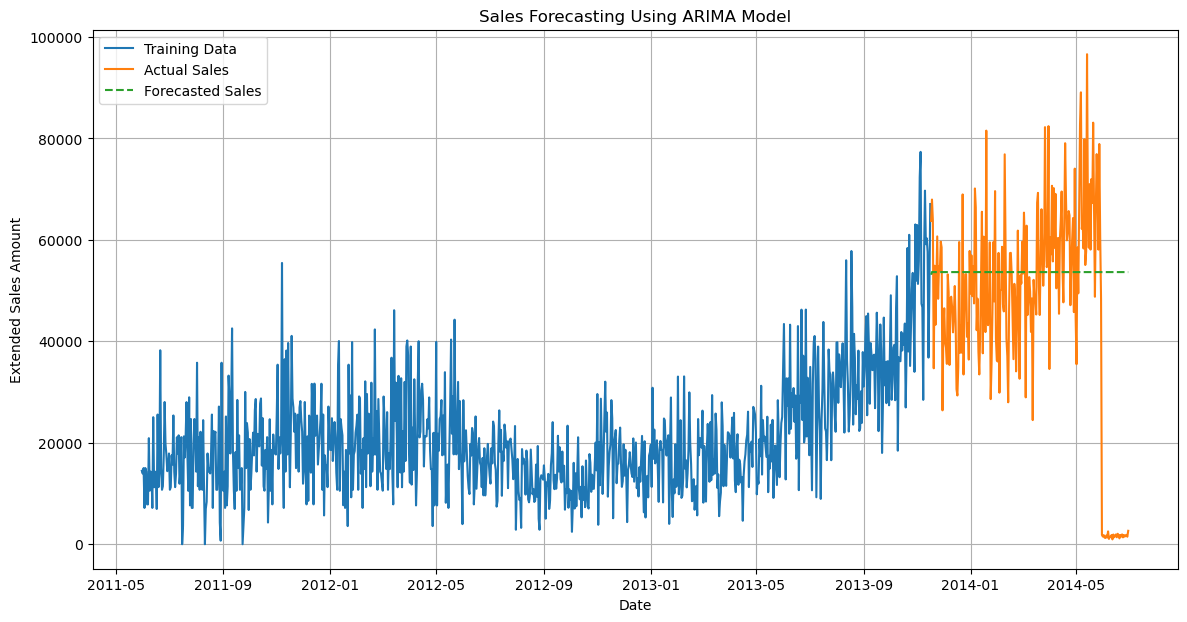

In [242]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings
warnings.filterwarnings('ignore')

# Use the daily_sales from previous code
# Split data into training and testing sets
train_data = daily_sales[:int(0.8 * len(daily_sales))]
test_data = daily_sales[int(0.8 * len(daily_sales)):]

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Plot the forecast against actual sales
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, forecast, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecasting Using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Extended Sales Amount')
plt.legend()
plt.grid()
plt.show()


## 8. Statistical Analysis

In [226]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
# We'll use 'year' and 'month' as predictors and 'extended_sales' as the target
X = sales_data[['year', 'month']]
y = sales_data['extended_sales']

# Handle missing values
X = X.dropna()
y = y.loc[X.index]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 565025.3819454635
R^2 Score: 0.339644854794088
